### Step-3- Data Preprocessing and Model Evalution

The goal of the Data Preprocessing is to find the best predictive features of the data and filter it so that it will enhance the predictive power of the analytics model.

#### Loading data and essential libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd 
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

#for visualization
import seaborn as sns


data=pd.read_csv("clean_data_binary_stroke.csv",index_col=False)
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

,age,hypertension,heart_disease,ever_married,stroke,urban,male,smoked,bmi_imputed,work_Never_worked,work_Private,work_Self-employed,work_children,glucose,body_mass_index,diabetes
0,4.204693,0,1,0,1,1,1,1,0,0,1,0,0,2.777415,0.981245,1
1,4.382027,0,1,0,1,0,1,0,0,0,1,0,0,0.013840,0.459222,0
2,3.891820,0,0,0,1,1,0,1,0,0,1,0,0,1.483980,0.701135,0
3,4.369448,1,0,0,1,0,0,0,0,0,0,1,0,1.549035,-0.623020,0
4,4.394449,0,0,0,1,1,1,1,0,0,1,0,0,1.821183,0.013593,0


In [2]:
data.shape

(4909, 16)

#### Label encoding
Here, I assign all of the features to a NumPy array X, and transform the class labels from the original string representation into integers

In [3]:
array=data.values
X=array[:,1:16]
y=array[:,0]

### Assesing Model Accuracy: Split data into training and test sets

The method is used to evaluate the performance of mechine learning algorithm by using different training and testing datasets.


***Split the available data into a training set and a testing set. (70% training, 30% test)

In [4]:
from sklearn.model_selection import train_test_split


##Split data set in train 70% and test 30%
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=8,stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3436, 15), (3436,), (1473, 15), (1473,))

#### Feature Standardization

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

In [5]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

sklearn is used to scale and transform the data in such a way so that each attribute has a mean value of zero(0) and a standard deviation of one(1)

#### Feature decomposition using Principal Component Analysis( PCA)

In [6]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)



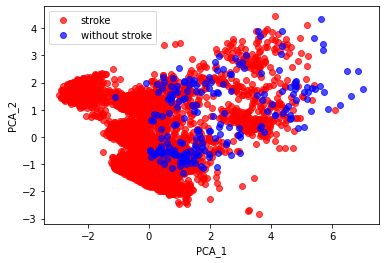

In [7]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.stroke == 0],PCA_df['PCA_2'][data.stroke == 0],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.stroke == 1],PCA_df['PCA_2'][data.stroke == 1],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['stroke','without stroke'])
plt.show()

In [8]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_


#### Deciding How Many Principal Components to Retain

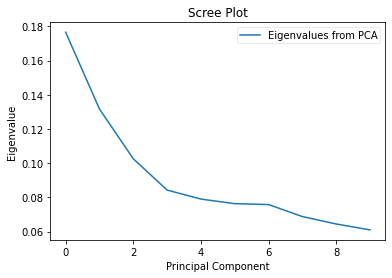

In [9]:
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

Observation


The most obvious change in slope in the scree plot occurs at component 2.5, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

## Model Evalution

In [10]:
from sklearn.model_selection import train_test_split

predictors = data.drop("stroke",axis=1)
stroke = data["stroke"]

X_train,X_test,y_train,y_test = train_test_split(predictors,stroke,test_size=0.30,random_state=8,stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3436, 15), (3436,), (1473, 15), (1473,))

In [11]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # checking accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

Here, kwargs function is used here to pass keyword arguments, because the number of keyword arguments are not clear.



#### Model Fitting

In [12]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train)

y_prediction_lr = logistic_reg.predict(X_test)
#print(y_pred_lr)

In [21]:
y_prediction_lr.shape
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 95.63%
Test accuracy: 96.06%


In [22]:
score_lr = round(accuracy_score(y_prediction_lr,y_test)*100,2)


print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 96.06 %


<AxesSubplot:>

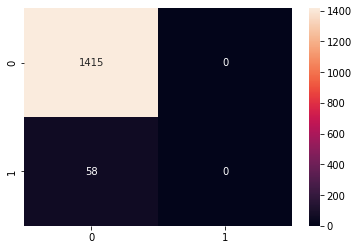

In [24]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_prediction_lr)
sns.heatmap(matrix,annot = True, fmt = "d")

### Support vector machine linear kernel

In [25]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

Y_prediction_svm_l = sv.predict(X_test)

In [26]:
Y_prediction_svm_l.shape
model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy: 95.61%
Test accuracy: 96.06%


In [27]:
score_svm_l = round(accuracy_score(Y_prediction_svm_l,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm_l)+" %")

The accuracy score achieved using Linear SVM is: 96.06 %


<AxesSubplot:>

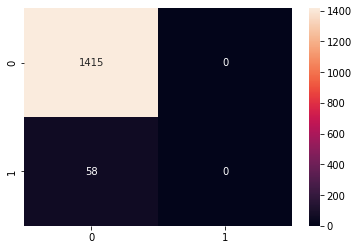

In [28]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, Y_prediction_svm_l)
sns.heatmap(matrix,annot = True, fmt = "d")

### Support vector machine RBF kernel

In [30]:
from sklearn.gaussian_process.kernels import RBF

sv = svm.SVC(kernel='rbf')

sv.fit(X_train, y_train)

y_pred_svm_rbf = sv.predict(X_test)

In [31]:
y_pred_svm_rbf.shape
model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy: 95.61%
Test accuracy: 96.06%


In [32]:
score_svm_rbf = round(accuracy_score(y_pred_svm_rbf,y_test)*100,2)

print("The accuracy score achieved using RBF SVM is: "+str(score_svm_rbf)+" %")

The accuracy score achieved using RBF SVM is: 96.06 %


<AxesSubplot:>

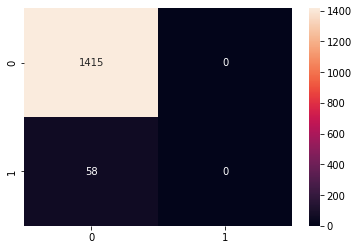

In [33]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred_svm_rbf)
sns.heatmap(matrix,annot = True, fmt = "d")

### k-nearest neighbors (KNN) Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [36]:
y_pred_knn.shape
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier)

Train accuracy: 95.95%
Test accuracy: 95.45%


In [37]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 95.79 %


<AxesSubplot:>

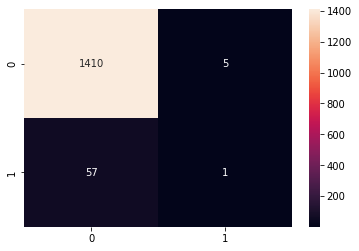

In [38]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix,annot = True, fmt = "d")

#### Comparison of classsifiers

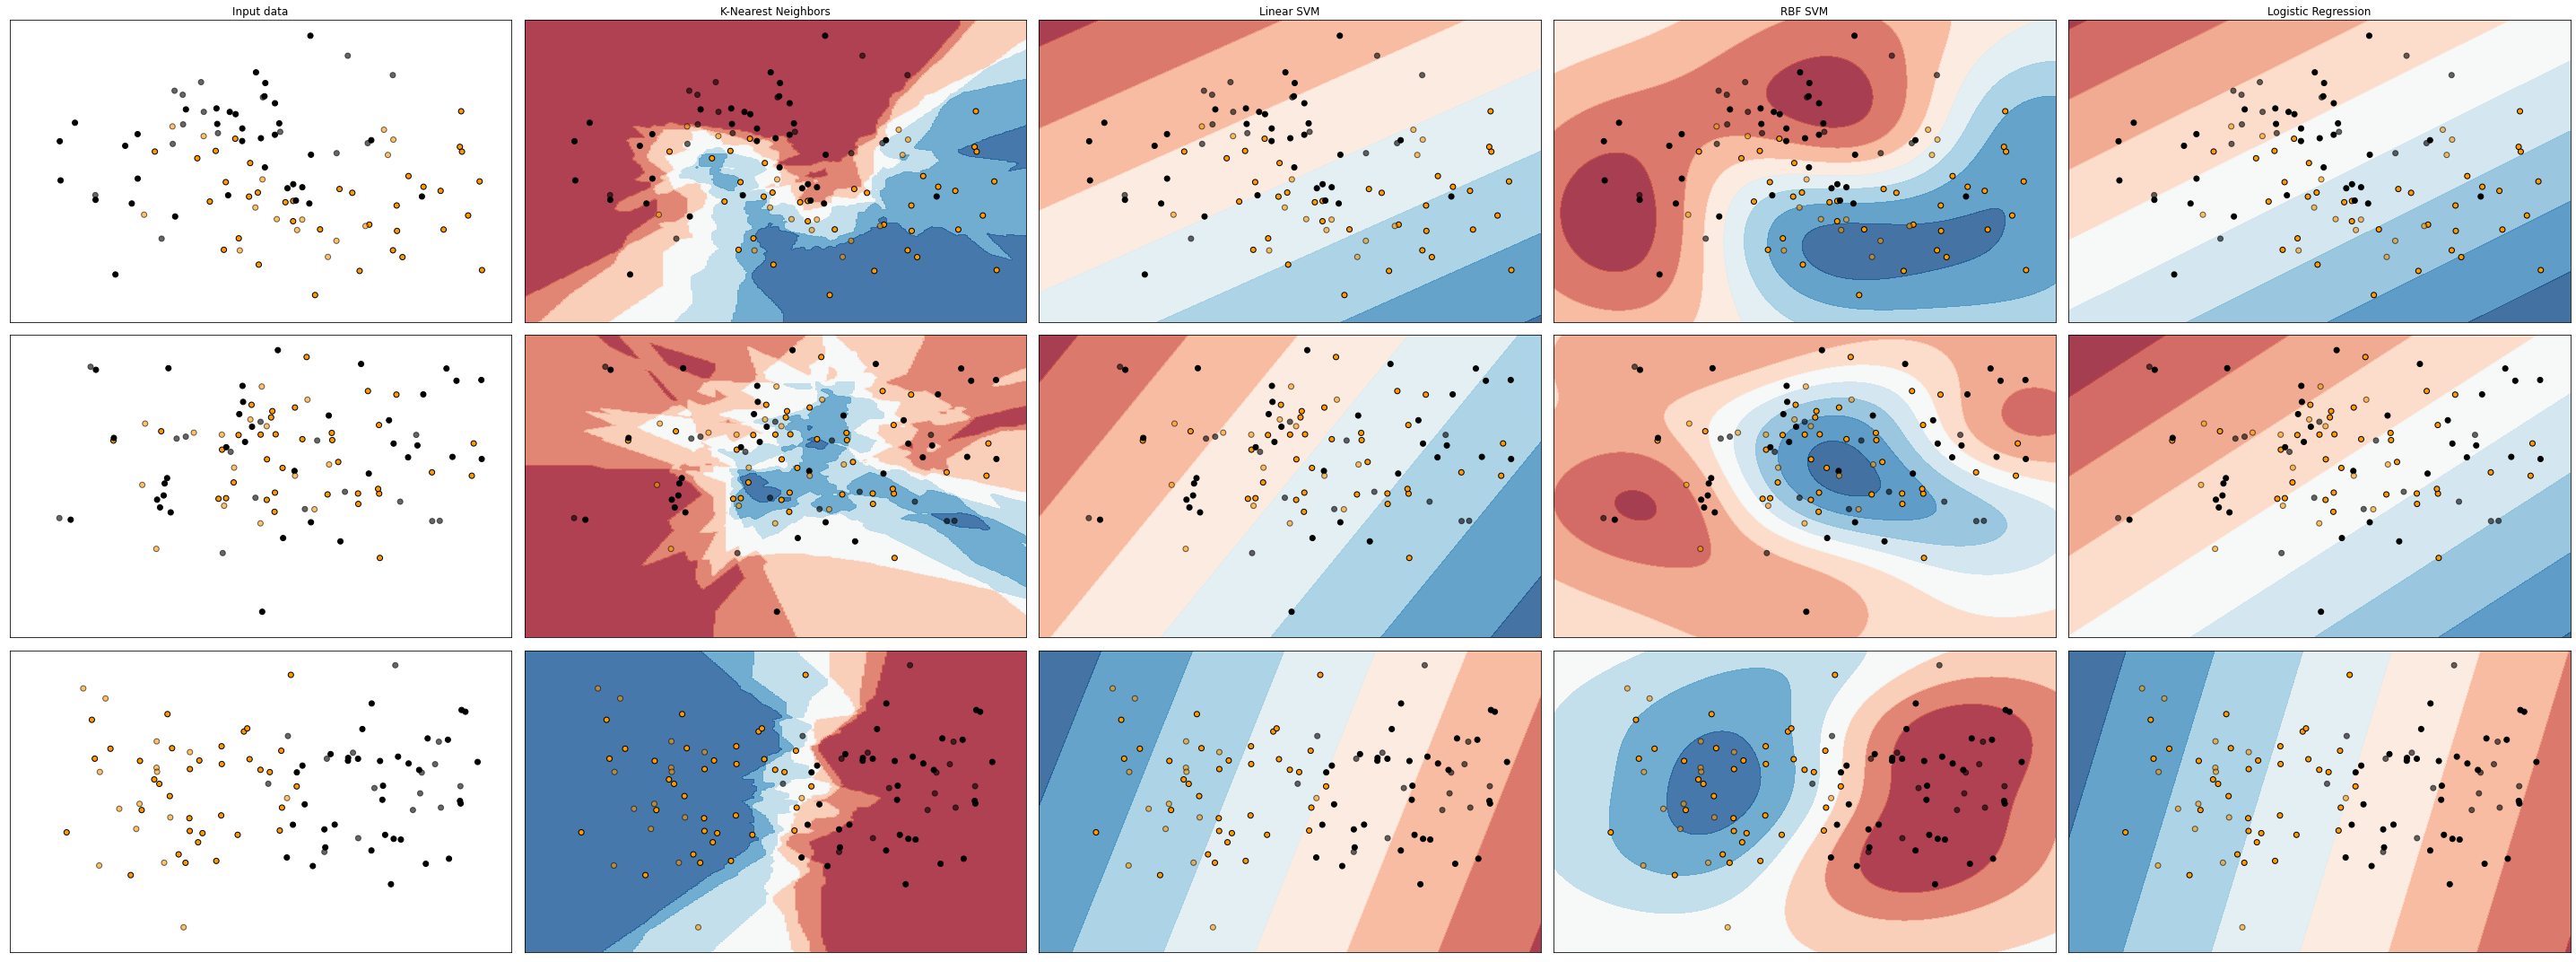

In [40]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "K-Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Logistic Regression",
    
]

classifiers = [
    
    KNeighborsClassifier(7),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    LogisticRegression(),
    
]


   

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(0)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.5, random_state=0),
    make_circles(noise=0.5, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(40, 15))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=8,stratify=y
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.3
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#000000", "#FF9900"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
              
        i += 1

plt.tight_layout()
plt.show()

    

The plots show training points in solid colors and testing points semi-transparent

### ROC Curve generation

ROC curve (receiver operating characteristic curve)is a graph represent the performance of classification model.

In [41]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)


In [42]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)





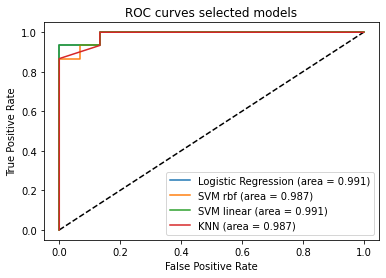

In [43]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves selected models')
plt.legend(loc='best')
plt.show()

 Area under the ROC Curve (AUC) measures the entire two-dimensional area underneath the entire ROC curve. Here, the heighst AUC observed in the SVM-RBF kernel and in Logistic Regression.

### Model tuning for improving accuracy scores

#### Logistic Regression

In [23]:
from sklearn.model_selection import GridSearchCV
log_grid = {'C': np.logspace(-5, 5),
            'solver': ['liblinear'],
            'max_iter': np.arange(1000, 2000, 100),
            'penalty':['l1', 'l2']
           }

log_gscv = GridSearchCV(LogisticRegression(random_state = 7),
                          param_grid=log_grid,
                          cv=5,
                          verbose=True)

log_gscv.fit(X_train, y_train)
log_tuned_score = log_gscv.score(X_test, y_test)
log_tuned_score_r = round((log_tuned_score)*100,2)
log_tuned_score_r

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


96.06

#### SVM- linear kernel

In [29]:
from sklearn.model_selection import GridSearchCV
svc_grid = {'C': np.logspace(-5, 5, 20),
            'kernel': ['linear'],
            'degree': [2,3,4]
           }

svc_gscv = GridSearchCV(svm.SVC(random_state = 31),
                        param_grid=svc_grid,
                        cv=5,
                        verbose=True)

svc_gscv.fit(X_train, y_train)
svc_tuned_score_l = svc_gscv.score(X_test, y_test)
svc_tuned_score_l_r = round((svc_tuned_score_l)*100,2)
svc_tuned_score_l_r

Fitting 5 folds for each of 60 candidates, totalling 300 fits


96.06

#### SVM- RBF kernel

In [34]:
svc_grid = {'C': np.logspace(-5, 5, 20),
            'kernel': ['rbf'],
            'degree': [2,3,4]
           }

svc_gscv = GridSearchCV(svm.SVC(random_state = 35),
                        param_grid=svc_grid,
                        cv=3,
                        verbose=True)

svc_gscv.fit(X_train, y_train)
svc_tuned_score_rbf = svc_gscv.score(X_test, y_test)
svc_tuned_score_rbf_r = round((svc_tuned_score_rbf)*100,2)
svc_tuned_score_rbf_r

Fitting 3 folds for each of 60 candidates, totalling 180 fits


96.06

#### K-neighbour classifier

In [39]:
knn_grid = {'n_neighbors': np.arange(2, 15),
            'leaf_size': [10, 15, 20, 25, 30, 35, 40, 45, 50],
            'p':[1,2,3,4,5], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree']}

knn_gscv = GridSearchCV(KNeighborsClassifier(),
                        param_grid=knn_grid,
                        cv=5,
                        verbose=True)

knn_gscv.fit(X_train, y_train)
knn_tuned_score = knn_gscv.score(X_test, y_test)
knn_tuned_score_r = round((knn_tuned_score)*100,2)
knn_tuned_score_r

Fitting 5 folds for each of 1755 candidates, totalling 8775 fits


95.99

### Compareing of original accuracy score and tuned accuracy score

#### Creating a dictionary with all scores

In [44]:

score = [{'Model':'Logistic Regression', 'Score': score_lr, 'Tuned_score': svc_tuned_score_l_r}, 
         {'Model':'SVC-linear', 'Score': score_svm_l, 'Tuned_score': svc_tuned_score_l_r},
         {'Model':'SVC-RBF', 'Score': score_svm_rbf, 'Tuned_score': svc_tuned_score_rbf_r},
         {'Model':'KNN', 'Score': score_knn , 'Tuned_score': knn_tuned_score_r}]

In [45]:
pd.DataFrame(score, columns=['Model','Score','Tuned_score'])

,Model,Score,Tuned_score
0,Logistic Regression,96.06,96.06
1,SVC-linear,96.06,96.06
2,SVC-RBF,96.06,96.06
3,KNN,95.79,95.99


### Model Comparison

In [47]:
scores = [score_lr,score_svm_l,score_svm_rbf,score_knn]
algorithms = ["Logistic Regression","Support Vector Machine-linear","Support vactor Machine-RBF","K-Nearest Neighbors"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 96.06 %
The accuracy score achieved using Support Vector Machine-linear is: 96.06 %
The accuracy score achieved using Support vactor Machine-RBF is: 96.06 %
The accuracy score achieved using K-Nearest Neighbors is: 95.79 %


/home/pinky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


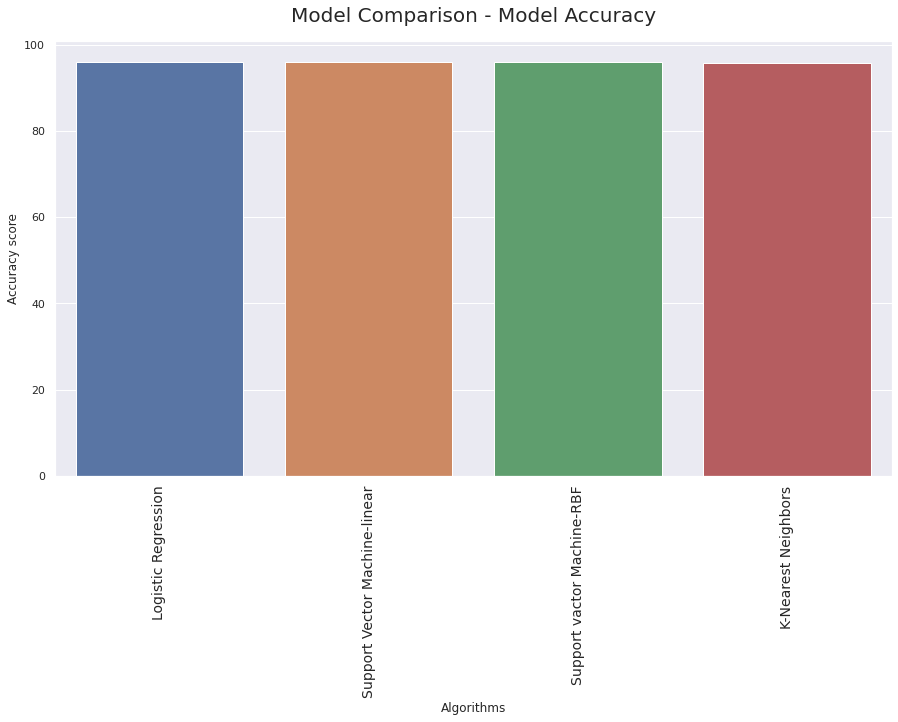

In [48]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.xticks(rotation=90, fontsize=14)

sns.barplot(algorithms,scores)
plt.title("Model Comparison - Model Accuracy", fontsize=20, fontname="Helvetica", y=1.03)
plt.show()

#fig, ax = plt.subplots(figsize=(12,6))
#sns.barplot(x=x,y=y, palette=pal);
#plt.ylabel("Model Accuracy")
#plt.xticks(rotation=40, fontsize=14)
#plt.title("Model Comparison - Model Accuracy", fontsize=20, fontname="Helvetica", y=1.03)
#plt.show()